# Dropout Layer in Deep Learning 

---

**Lecture Notes: Dropout Layer in Deep Learning**

**1. Introduction to Dropout**

*   **Context:** Dropout is a recently discovered and widely used technique in deep learning for training neural networks more effectively. It is one of several crucial techniques, following concepts like Early Stopping and Normalising Inputs, aimed at improving neural network performance.
*   **Purpose:** The primary goal of Dropout is to **address and reduce overfitting** in neural networks. It helps to regularise the network, leading to better generalisation on unseen data.
*   **Impact:** When used correctly, Dropout can lead to a significant improvement in network performance, potentially reducing error by around 2%. This is considered a substantial jump, for instance, from 95% to 97% accuracy.

**2. The Problem: Overfitting in Neural Networks**

*   **Definition:** Overfitting is a common problem in machine learning where a model learns the training data "by heart," performing exceptionally well on it but poorly on new, unseen data.
*   **Visual Example:** In a classification problem, an overfit model might create a highly complex, "wiggly" decision boundary that perfectly separates training points (e.g., blue and red points) but would likely perform poorly on new data. A better model would create a simpler, more generalising boundary.
*   **Why Neural Networks are Prone to Overfitting:** Neural networks are inherently complex due to their multiple layers and numerous nodes within each layer. This complexity allows them to capture every small pattern and possibility in the training data, even noise, leading to overfitting.

**3. General Solutions to Overfitting**

Several methods can be employed to combat overfitting:
*   **Add More Data:** Providing a larger and more diverse dataset helps the network to generalise better.
*   **Reduce Network Complexity:** Decreasing the number of hidden layers or the number of nodes per layer can reduce the model's capacity to overfit.
*   **Early Stopping:** This technique, previously discussed, monitors validation performance and stops training when overfitting begins.
*   **Regularisation (L1/L2):** Techniques like L1 and L2 regularisation add penalties to the loss function based on the magnitude of weights, discouraging large weights and complex models.
*   **Dropout:** The focus of these notes, Dropout is a distinct and highly effective technique for reducing overfitting.

**4. What is Dropout? (Core Concept)**

*   **Inventors:** Dropout was discovered a few years ago by Nitish Srivastava and others.
*   **Mechanism:** Dropout addresses overfitting by **randomly "dropping out" (turning off) nodes** in the input and hidden layers of the neural network during training.
*   **How it Works (Per Epoch):**
    *   For **every epoch**, a random subset of nodes in the input and hidden layers is temporarily deactivated.
    *   Deactivating a node means it is **disconnected from all other nodes**; its weights and biases are effectively removed from the network for that specific epoch.
    *   The remaining, active nodes form a **smaller, "thinned" neural network** (a sub-network) which is then used for training in that epoch.
    *   In the next epoch, a *different* random subset of nodes is dropped, creating a *new* unique sub-network.
    *   This process means that over multiple epochs, you are effectively training an **ensemble of many different neural networks**.

**5. Intuition Behind Dropout's Effectiveness: Why it Works**

*   **Reduces Network Complexity:** By randomly dropping nodes, Dropout effectively reduces the number of active nodes and connections in the network for each training step. This directly addresses the problem of overly complex networks trying to capture every small pattern.
*   **Prevents Co-adaptation of Neurons:**
    *   In a standard neural network, neurons can become highly dependent on each other, meaning a specific neuron might rely heavily on the output of another specific neuron to learn a particular pattern. This is like specific "arrangements" in the network becoming too specialised.
    *   With Dropout, a neuron cannot rely on the presence of any other specific neuron because that neuron might be dropped out in the next epoch.
    *   This forces neurons to become **more robust and learn more independently**. They are encouraged to focus on a broader range of features and patterns from various inputs rather than over-specialising on one.
    *   **Analogy:** Imagine a company where 50% of employees are randomly absent each day. Employees can no longer rely on specific colleagues for tasks (e.g., "I'll just wait for the first person to send me the input") and are forced to become more versatile, learn multiple tasks, and cooperate with different combinations of colleagues. This makes the entire "system" (the company/network) more resilient and less sensitive to small changes.

**Dropout as an Ensemble Method (Random Forest Analogy)**

**Random Forest**
- Builds an **explicit ensemble** of decision trees.  
- Each tree is trained on a **random subset of the data** (rows and/or features).  
- During prediction, all trees are used and their outputs are **combined**  
  - Majority vote (classification)  
  - Averaging (regression)  
- The randomness and ensembling reduce variance and prevent overfitting.  

---

**Dropout in Neural Networks**
- Creates an **implicit ensemble** of neural networks.  
- If a neural network has `N` hidden neurons, each neuron can either be **kept** or **dropped** during training.  
- This gives rise to up to `2^N` possible **sub-networks**.  
- Over the course of training (with random dropout masks applied at each step), the model effectively trains a huge number of these sub-networks that **share weights**.  
- At inference time:  
  - We don’t explicitly average all sub-networks (which would be infeasible).  
  - Instead, we use the **full network with scaled activations/weights**, which approximates the effect of averaging across the ensemble.  

---

**Similarities**
- Both Random Forest and Dropout reduce overfitting.  
- Both rely on the principle of training **multiple diverse models** and combining their “collective wisdom.”  

**Differences**
- **Random Forest** → Many separate models explicitly trained and averaged.  
- **Dropout** → One model trained as if it were an ensemble, then approximated efficiently at test time.  


**7. Dropout Parameters: The Dropout Ratio (`p`)**

*   **Definition:** The `dropout_ratio` (often denoted as `p`) is the probability of a neuron being dropped out.
*   **Example:** If `p = 0.5`, it means 50% of the neurons in that specific layer will be randomly dropped during each epoch.
*   **Layer-Specific:** You can specify a different dropout ratio for each layer (e.g., `p=0.5` for an input layer, `p=0.5` for a hidden layer).
*   **Effect:** A higher `p` means more neurons are dropped, leading to a "thinner" network and stronger regularisation.

**8. Dropout During Training vs. Testing**

*   **Training Time:** Dropout is **only active during the training phase** of the neural network. This is when nodes are randomly dropped to create the ensemble of sub-networks.
*   **Testing/Prediction Time:** When the model is used for prediction (testing), **all nodes are active**, and no dropout is applied.
*   **Weight Scaling for Testing:**
    *   Since neurons were randomly dropped during training, the active neurons learned to compensate by having larger weights. If all neurons were simply activated during testing without adjustment, the total output from a layer would be much higher than what the network was trained on.
    *   To compensate, the weights of the neurons in the Dropout layer are **scaled down** during testing.
    *   **Formula:** If `W` is a weight learned during training and `p` is the dropout ratio, the effective weight used during testing becomes `W * (1 - p)`.
    *   **Intuition:** If a neuron had a `p` probability of being dropped (e.g., 0.25), it means it was active for `(1 - p)` (e.g., 0.75) of the training epochs. Therefore, its learned weight needs to be scaled by this probability (`0.75`) to reflect its average contribution during training when all nodes are active.
    *   **Keras Implementation:** Keras automatically handles this weight scaling behind the scenes. You only need to specify the Dropout layer during model construction, and Keras will apply Dropout during training and perform the correct weight scaling for inference.

---

**9. Practical Tips for Using Dropout**

*   **Adjust `p` based on Overfitting/Underfitting:**
    *   If **overfitting**, **increase** the `p` value.
    *   If **underfitting**, **decrease** the `p` value.
*   **Strategic Placement:** Consider applying dropout to the **last hidden layer first** and observe the results before adding it to other layers.
*   **Recommended `p` Values for Different Architectures:**
    *   **CNNs (Convolutional Neural Networks):** Typically `0.4` to `0.5` (40-50%).
    *   **RNNs (Recurrent Neural Networks):** Typically `0.1` to `0.15` (10-15%).

**10. Challenges/Problems with Dropout**

*   **Delayed Convergence:** Experimentally, using Dropout tends to **slow down the training process** as the neural network takes longer to converge to optimal weights and biases.
*   **Changes in Loss/Cost Function:** Dropout causes the **loss function to effectively change** at each epoch because a different sub-network is being trained. This can make **debugging gradients more difficult**, as the calculations are constantly varying.
*   **Overall Benefit:** Despite these issues, Dropout generally provides significant benefits and **should be used**.


# Code 

## Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/pankaj-2708/Machine-Learning/refs/heads/main/Datasets/placement.csv")

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

model=Sequential()
model.add(Dense(10,input_dim=2,activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(6,activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\panka\anaconda3\envs\DL\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df.drop(columns='placed')
y=df['placed']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [13]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5275 - loss: 0.6929 - val_accuracy: 0.5050 - val_loss: 0.6981
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5225 - loss: 0.6898 - val_accuracy: 0.5150 - val_loss: 0.6980
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5425 - loss: 0.6899 - val_accuracy: 0.5150 - val_loss: 0.6980
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5050 - loss: 0.6948 - val_accuracy: 0.5100 - val_loss: 0.6981
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5462 - loss: 0.6863 - val_accuracy: 0.5150 - val_loss: 0.6981
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5225 - loss: 0.6911 - val_accuracy: 0.5100 - val_loss: 0.6982
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5138 - loss: 0.6932 - val_accuracy: 0.5200 - val_loss: 0.6981
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5350 - loss: 0.6914 - val_accuracy: 0.

In [19]:
hst=pd.DataFrame(history.history)

In [20]:
hst.head()

,accuracy,loss,val_accuracy,val_loss
0,0.52750,0.692892,0.505,0.698085
1,0.52250,0.689825,0.515,0.698031
2,0.54250,0.689939,0.515,0.698047
3,0.50500,0.694829,0.510,0.698068
4,0.54625,0.686298,0.515,0.698113


<Axes: >

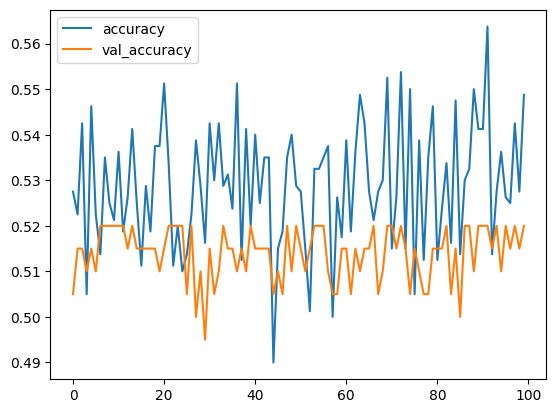

In [23]:
hst[['accuracy','val_accuracy']].plot(kind='line')

# Regression

In [24]:
import pandas as pd
import numpy as np

In [40]:
df=pd.read_csv("https://raw.githubusercontent.com/nicolelumagui/ML-Exercise_Advertising_Linear-Regression/refs/heads/master/IPYNB%20and%20Dataset/Advertising.csv")

In [41]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

model=Sequential()
model.add(Dense(10,input_dim=3,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='adam',metrics=['mse'])

C:\Users\panka\anaconda3\envs\DL\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df.drop(columns='Sales')
y=df['Sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [62]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 220.6624 - mse: 220.6624 - val_loss: 241.1241 - val_mse: 241.1241
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 220.0770 - mse: 220.0770 - val_loss: 240.4664 - val_mse: 240.4664
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 219.8837 - mse: 219.8837 - val_loss: 239.8003 - val_mse: 239.8003
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 218.7085 - mse: 218.7085 - val_loss: 239.1400 - val_mse: 239.1400
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 217.8615 - mse: 217.8615 - val_loss: 238.4348 - val_mse: 238.4348
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 217.9667 - mse: 217.9667 - val_loss: 237.6994 - val_mse: 237.6994
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 216.7122 - mse: 216.7122 - val_loss: 236.9583 - val_mse: 236.9583
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 216.0345 - mse: 216.0345 - val_loss: 236.1895 - val_mse: 236.1895
Epoch 9

<Axes: >

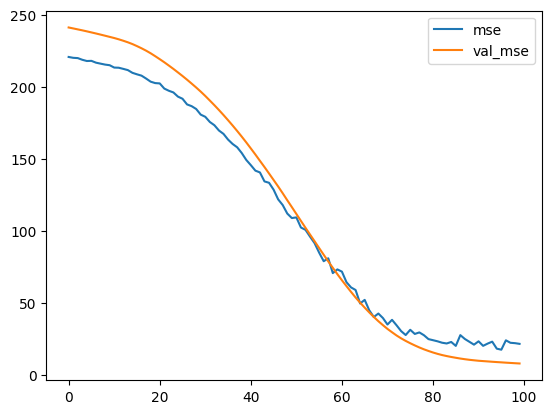

In [63]:
hst=pd.DataFrame(history.history)
hst[['mse','val_mse']].plot(kind='line')